# Introduction to Pulsar Timing with libstempo

## Tutorial provided with libstempo

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import print_function
import sys, math, numpy as N, matplotlib.pyplot as P

In [5]:
from libstempo.libstempo import *
import libstempo

In [6]:
libstempo.__path__

['/Users/mjai/opt/anaconda3/envs/pta_pulsar/lib/python3.9/site-packages/libstempo']

In [7]:
import libstempo as T

T.data = T.__path__[0] + '/data/' # example files

In [8]:
print("Python version   :",sys.version.split()[0])
print("libstempo version:",T.__version__)
print("Tempo2 version   :",T.libstempo.tempo2version())

Python version   : 3.9.12
libstempo version: 2.4.4
Tempo2 version   : 2022.1.1


/var/folders/cw/yj7cg7r13h30xxtwqt8pxsrc0000gs/T/ipykernel_14722/2975463369.py:3: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print("Tempo2 version   :",T.libstempo.tempo2version())


In [9]:
psr = T.tempopulsar(
    parfile=T.data + "/J1909-3744_NANOGrav_dfg+12.par", 
    timfile=T.data + "/J1909-3744_NANOGrav_dfg+12.tim"
)

/var/folders/cw/yj7cg7r13h30xxtwqt8pxsrc0000gs/T/ipykernel_14722/4155726852.py:1: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  psr = T.tempopulsar(


In [10]:
psr.name

'1909-3744'

In [11]:
psr.nobs

1001

In [12]:
psr.stoas

array([53292.01653553, 53292.04810963, 53355.83359728, ...,
       54641.17334037, 54706.99327092, 54764.83484499], dtype=float128)

In [13]:
psr.toaerrs.min()

0.022

In [14]:
psr.toaerrs

array([1.231, 4.668, 0.453, ..., 0.158, 1.336, 0.316])

In [15]:
psr.freqs

array([1372., 1372., 1372., ...,  884.,  884.,  884.])

In [16]:
psr.toas()

array([53292.01663801, 53292.04820909, 53355.82916309, ...,
       54641.1796227 , 54706.99748746, 54764.83381846], dtype=float128)

Again, let's now fit for all of the parameters. Do you get a good fit at the end?

In [17]:
psr.ssbfreqs()

array([1.37213133e+09, 1.37213155e+09, 1.37204346e+09, ...,
       8.83982927e+08, 8.84066115e+08, 8.84080037e+08])

In [18]:
help(psr.residuals)

Help on built-in function residuals:

residuals(...) method of libstempo.libstempo.tempopulsar instance
    tempopulsar.residuals(updatebats=True,formresiduals=True,removemean=True)
    
    Returns residuals as a numpy.longdouble array (a copy of current values).
    Will update TOAs/recompute residuals if `updatebats`/`formresiduals` is True
    (default for both). Will remove residual mean if `removemean` is True;
    first residual if `removemean` is 'first'; weighted residual mean
    if `removemean` is 'weighted'.
    
    If `removemean` is `refphs` then the residuals will be referenced to the TZR
    parameters (TZRMJD, TZRSITE, TZRFREQ) given in the parameter file, or, if
    given, the `epoch`, `site` and `freq` values.



In [19]:
psr.residuals().min()

-1.9495585499340339725e-05

In [20]:
psr.residuals()

array([-8.84315666e-08,  7.20269163e-06,  1.09370226e-06, ...,
        3.89930165e-07,  1.40246206e-06, -5.17395519e-07], dtype=float128)

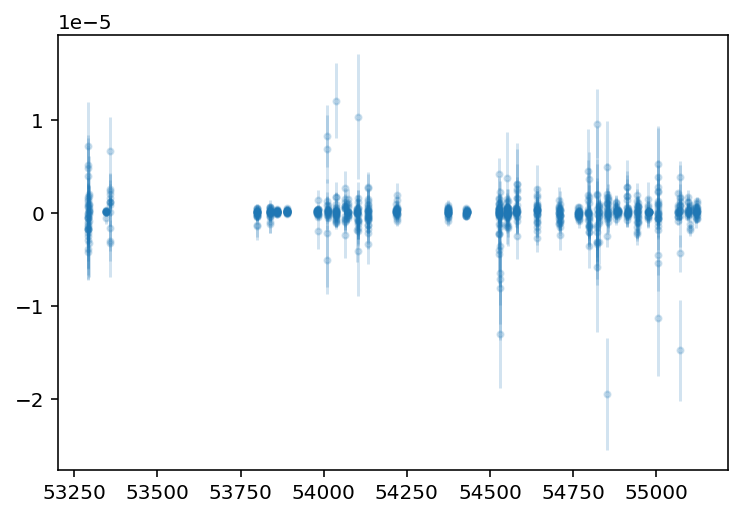

In [21]:
# get sorted array of indices
i = N.argsort(psr.toas())
# use numpy fancy indexing to order residuals 
P.errorbar(psr.toas()[i],psr.residuals()[i],yerr=1e-6*psr.toaerrs[i],fmt='.',alpha=0.2);

In [22]:
psr.flags()

['fe', 'be', 'B', 'bw', 'tobs', 'pta', 'proc', 'chanid']

In [23]:
psr.flagvals('chanid')

array(['gasp_1372', 'gasp_1372', 'gasp_1372', ..., 'gasp_884', 'gasp_884',
       'gasp_884'], dtype='<U32')

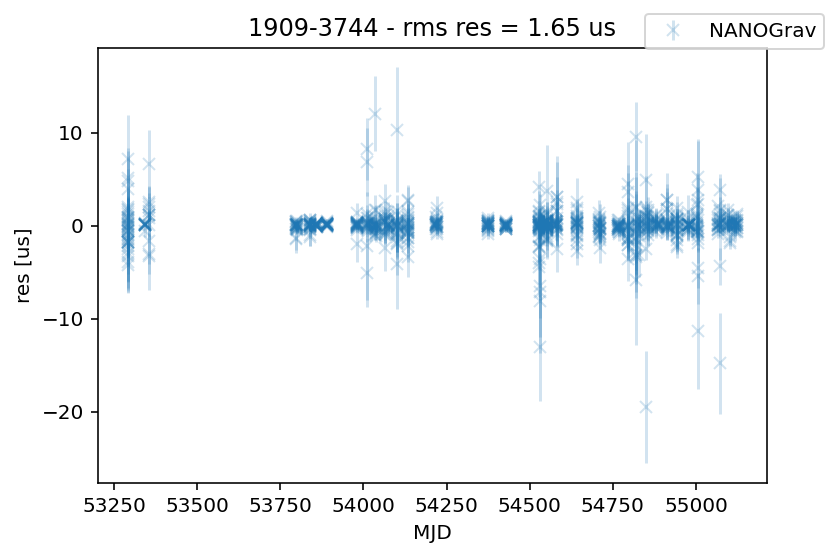

In [24]:
import libstempo.plot as LP

LP.plotres(psr,group='pta',alpha=0.2)

In [25]:
psr['RAJ'].val, psr['RAJ'].err, psr['RAJ'].fit, psr['RAJ'].set

(5.0169080674060326785, 7.753759525058565179e-10, True, True)

In [26]:
fitpars = psr.pars() # defaults to fitted parameters
setpars = psr.pars(which='set')
allpars = psr.pars(which='all')

print(len(fitpars),len(setpars),len(allpars))
print(fitpars[:10])

82 158 4658
('RAJ', 'DECJ', 'F0', 'F1', 'PMRA', 'PMDEC', 'PX', 'SINI', 'PB', 'A1')


In [27]:
psr.ndim

82